# Imports

In [13]:
from pymoo.problems import get_problem
from pymoo.termination import get_termination
from pymoo.algorithms.moo.nsga2 import NSGA2
from pymoo.optimize import minimize
from pymoo.visualization.scatter import Scatter
from pymoo.decomposition.asf import ASF
from pymoo.mcdm.pseudo_weights import PseudoWeights
from pymoo.indicators.hv import Hypervolume
from pymoo.util.running_metric import RunningMetricAnimation
import matplotlib.pyplot as plt
import numpy as np
from pymoo.indicators.igd import IGD

# Inizializzazione e risoluzione del problema

In [2]:
problem = get_problem("dtlz7")
algorithm = NSGA2()
termination = get_termination("n_gen", 100)

res = minimize(problem, algorithm, termination, seed=1, save_history=True, verbose=True)

X = res.X
F = res.F

n_gen  |  n_eval  | n_nds  |      igd      |       gd     
     1 |      100 |     13 |  2.0824271241 |  2.9039029510
     2 |      200 |     17 |  1.7798715061 |  3.0859228279
     3 |      300 |     20 |  1.5779240241 |  2.8429433369
     4 |      400 |     23 |  1.4209239408 |  2.8911757225
     5 |      500 |     27 |  1.1647128695 |  2.3255183234
     6 |      600 |     31 |  1.1545676028 |  2.3382207237
     7 |      700 |     28 |  0.9431516532 |  1.8391007120
     8 |      800 |     37 |  0.9365121602 |  1.7630451107
     9 |      900 |     40 |  0.9157144926 |  1.6176720875
    10 |     1000 |     39 |  0.6840262197 |  1.5519536974
    11 |     1100 |     47 |  0.6607135111 |  1.3377688451
    12 |     1200 |     48 |  0.6072125810 |  1.2814211306
    13 |     1300 |     43 |  0.5967691084 |  0.9945527357
    14 |     1400 |     58 |  0.5364842558 |  0.9144463126
    15 |     1500 |     57 |  0.4710737604 |  0.7898059003
    16 |     1600 |     58 |  0.4332132557 |  0.67005903

# Visualizzazione

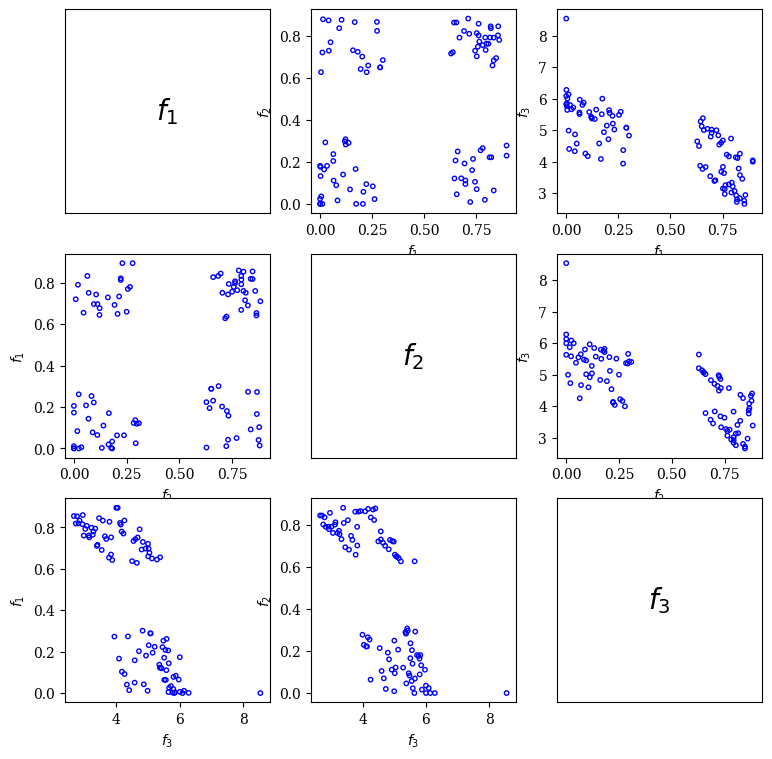

In [3]:
scatter_matrix = Scatter(plot_3d=False)
scatter_matrix.figsize = (9, 9)
scatter_matrix.add(F, facecolors="none", edgecolors="blue", s=10)
scatter_matrix.show()

Ideal Point (Approx): [2.03173229e-09 5.38297608e-11 2.65740065e+00]
Nadir Point (Approx): [0.89489669 0.88338194 8.54354701]


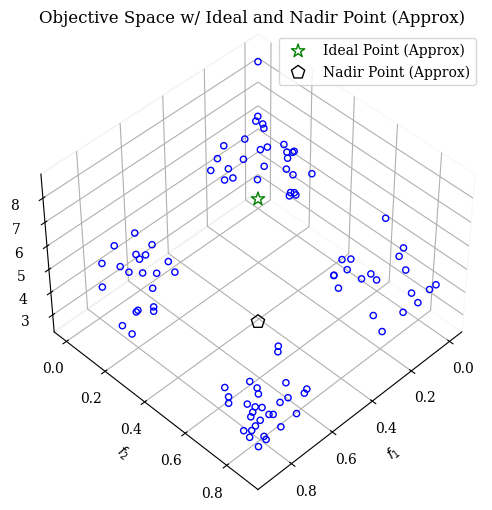

In [4]:
approx_ideal = F.min(axis=0)
approx_nadir = F.max(axis=0)

print("Ideal Point (Approx):", approx_ideal)
print("Nadir Point (Approx):", approx_nadir)

obj_space_scatter = Scatter()
obj_space_scatter.add(F, facecolors="none", edgecolors="blue")
obj_space_scatter.add(approx_ideal, facecolors="none", edgecolors="green", marker="*", s=100, label="Ideal Point (Approx)")
obj_space_scatter.add(approx_nadir, facecolors="none", edgecolors="black", marker="p", s=100, label="Nadir Point (Approx)")
obj_space_scatter.title = "Objective Space w/ Ideal and Nadir Point (Approx)"
obj_space_scatter.legend = "True"
obj_space_scatter.show()

In [5]:
F = (F - approx_ideal) / (approx_nadir - approx_ideal)

Best solution regarding ASF: Point 
i = 16
F = [0.15313339 0.3292729  0.45795465]


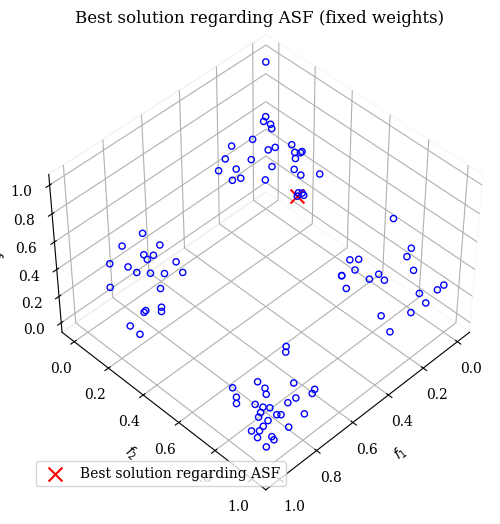

In [6]:
set_weights = np.array([0.4, 0.3, 0.3])

decomp = ASF()
i = decomp.do(F, 1 / set_weights).argmin()

print("Best solution regarding ASF: Point \ni = %s\nF = %s" % (i, F[i]))

set_weights_scatter = Scatter()
set_weights_scatter.add(F, facecolors="none", edgecolors="blue")
set_weights_scatter.add(F[i], facecolors="red", marker="x", s=100, label="Best solution regarding ASF")
set_weights_scatter.title = "Best solution regarding ASF (fixed weights)"
set_weights_scatter.legend = "True"
set_weights_scatter.show()

Best solution regarding pseudo weights: Point 
i = 16
F = [0.15313339 0.3292729  0.45795465]


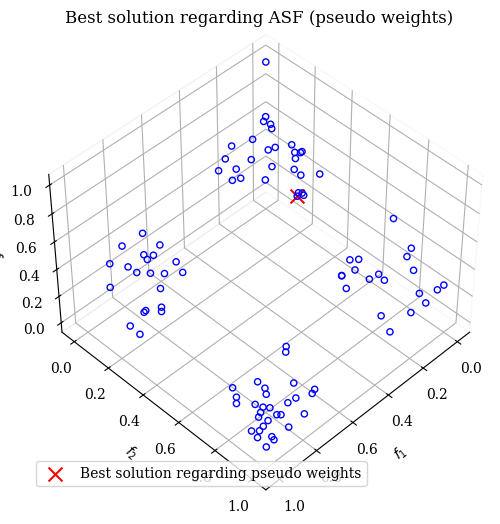

In [7]:
i = PseudoWeights(set_weights).do(F)

print("Best solution regarding pseudo weights: Point \ni = %s\nF = %s" % (i, F[i]))

pseudo_weights_scatter = Scatter()
pseudo_weights_scatter.add(F, facecolors="none", edgecolors="blue")
pseudo_weights_scatter.add(F[i], facecolors="red", marker="x", s=100, label="Best solution regarding pseudo weights")
pseudo_weights_scatter.title = "Best solution regarding ASF (pseudo weights)"
pseudo_weights_scatter.legend = "True"
pseudo_weights_scatter.show()

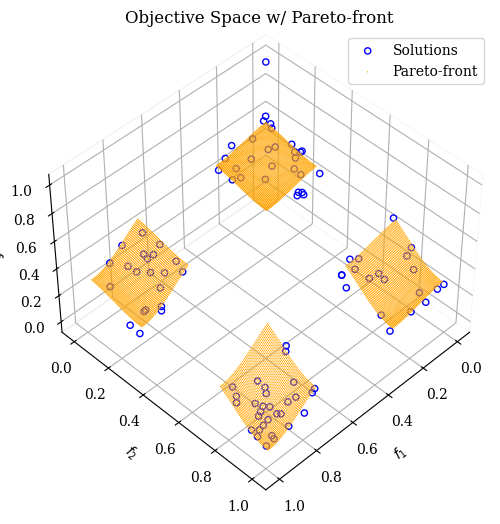

In [8]:
pf = problem.pareto_front()

pf = (pf - approx_ideal) / (approx_nadir - approx_ideal)

pf_and_sol_scatter = Scatter(angle=(45, 45))
pf_and_sol_scatter.add(F, facecolors="none", edgecolors="blue", label="Solutions")
pf_and_sol_scatter.add(pf, facecolors="orange", edgecolors="none", label="Pareto-front", s=1)
pf_and_sol_scatter.title = "Objective Space w/ Pareto-front"
pf_and_sol_scatter.legend = "True"
pf_and_sol_scatter.show()

# Valutazione delle performance

In [9]:
n_evals = []
hist_F = []
hist_cv = []
hist_cv_avg = []

for algo in res.history:
    n_evals.append(algo.evaluator.n_eval)
    hist_cv.append(algo.opt.get("CV").min())
    hist_cv_avg.append(algo.pop.get("CV").mean())
    feas = np.where(algo.opt.get("feasible"))[0]
    hist_F.append(algo.opt.get("F")[feas])

Whole population feasible in Generation 0 after 100 evaluations.


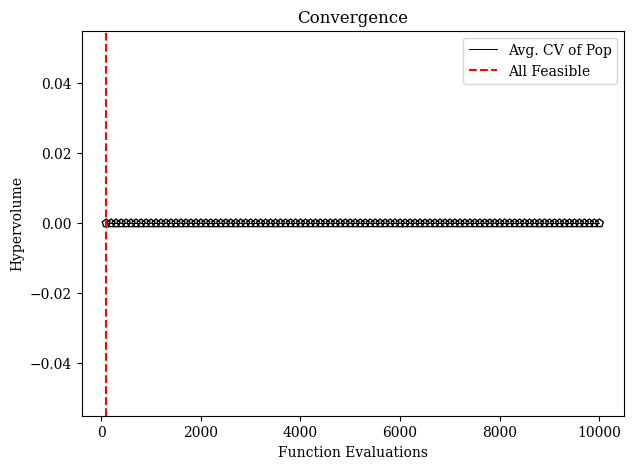

In [10]:

k = np.where(np.array(hist_cv_avg) <= 0.0)[0].min()
print(f"Whole population feasible in Generation {k} after {n_evals[k]} evaluations.")

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hist_cv_avg,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hist_cv,  facecolor="none", edgecolor='black', marker="p")
plt.axvline(n_evals[k], color="red", label="All Feasible", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.legend()
plt.show()

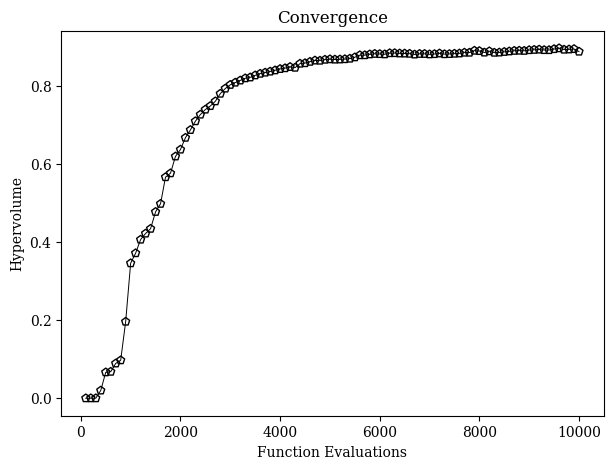

In [11]:
metric = Hypervolume(
    ref_point= np.array([1.1, 1.1, 1.1]),
    norm_ref_point=False,
    zero_to_one=True,
    ideal=approx_ideal,
    nadir=approx_nadir
    )

hv = [metric.do(_F) for _F in hist_F]

plt.figure(figsize=(7, 5))
plt.plot(n_evals, hv,  color='black', lw=0.7, label="Avg. CV of Pop")
plt.scatter(n_evals, hv,  facecolor="none", edgecolor='black', marker="p")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("Hypervolume")
plt.show()

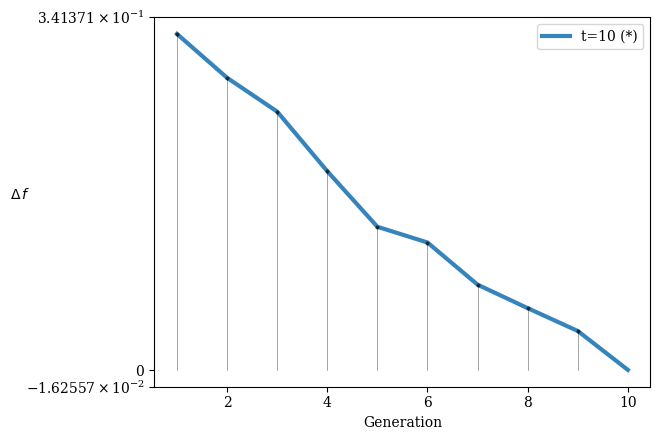

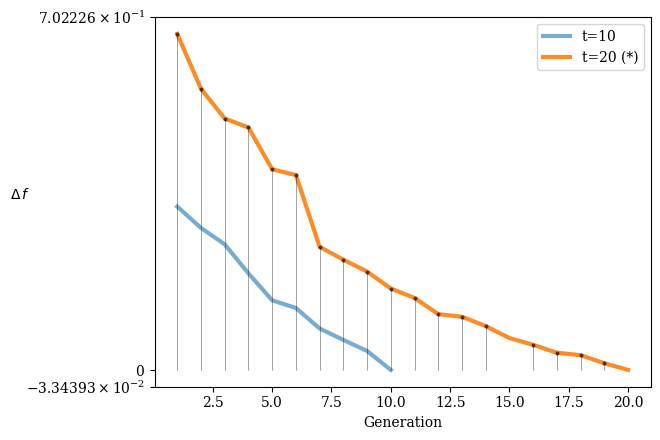

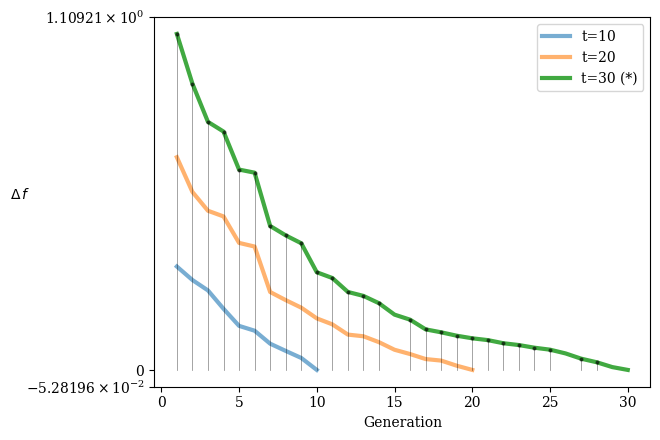

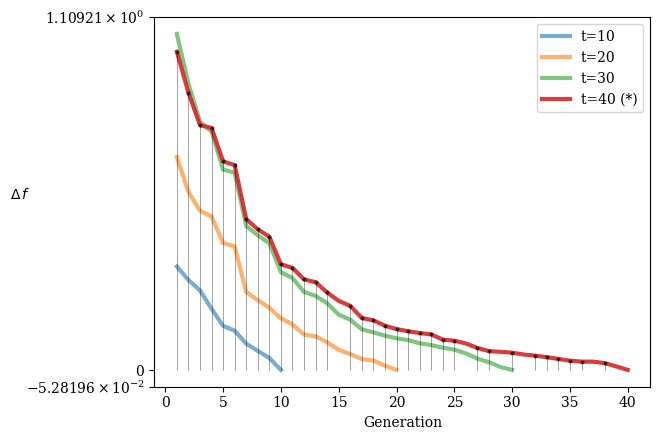

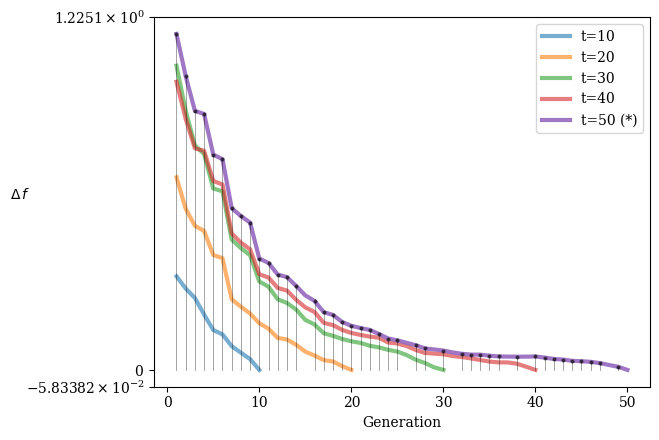

In [12]:
running_rirst_generations = RunningMetricAnimation(
    delta_gen=10,
    n_plots=5,
    key_press=False,
    do_show=True
    )

for algorithm in res.history[:50]:
    running_rirst_generations.update(algorithm)

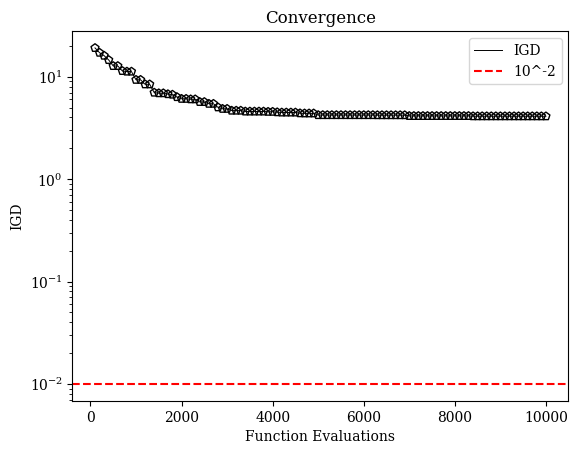

In [15]:
metric = IGD(pf, zero_to_one=True)

igd = [metric.do(_F) for _F in hist_F]

plt.plot(n_evals, igd,  color='black', lw=0.7, label="IGD")
plt.scatter(n_evals, igd,  facecolor="none", edgecolor='black', marker="p")
plt.axhline(10**-2, color="red", label="10^-2", linestyle="--")
plt.title("Convergence")
plt.xlabel("Function Evaluations")
plt.ylabel("IGD")
plt.yscale("log")
plt.legend()
plt.show()